In [60]:
from keras.datasets import reuters
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical

from keras import models
from keras import layers

import seaborn as sns

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 4s 2us/step


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [21]:
%%time

def vectorize_sequances(sequances, dimensional = 10000):
    results = np.zeros((len(sequances), dimensional))
    for i, sequance in tqdm(enumerate(sequances)):
        results[i, sequance] = 1
    return results

X_train = vectorize_sequances(train_data)
X_test = vectorize_sequances(test_data)


Wall time: 724 ms


In [46]:
y_train = to_categorical(train_labels, dtype = 'int8')
y_test = to_categorical(test_labels, dtype = 'int8')

In [55]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(y_train.shape[1], activation = 'softmax'))
model1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [57]:
partial_X_train, X_val = X_train[1000:], X_train[:1000]
partial_y_train, y_val = y_train[1000:], y_train[:1000]

In [59]:
%%time
history1 = model1.fit(partial_X_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 79ms/step - loss: 3.0965 - accuracy: 0.4405 - val_loss: 1.7092 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4959 - accuracy: 0.6860 - val_loss: 1.3165 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0470 - accuracy: 0.7748 - val_loss: 1.1578 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8225 - accuracy: 0.8275 - val_loss: 1.0422 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.6529 - accuracy: 0.8629 - val_loss: 0.9778 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.5179 - accuracy: 0.8921 - val_loss: 0.9750 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4408 - accuracy: 0.9054 - val_loss: 0.9271 - val_accuracy: 0.8110
Epoch 8/20
16

In [69]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

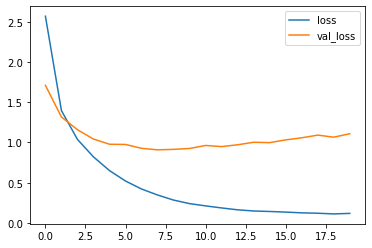

In [85]:
history = history1.history
x = range(len(history['loss']))

ax = sns.lineplot(x, history['loss'])
sns.lineplot(x, history['val_loss'], ax = ax)
ax.legend(['loss', 'val_loss']);

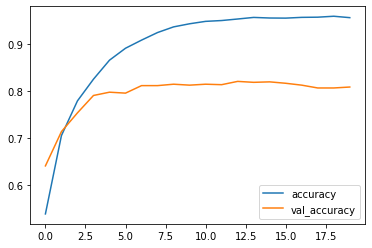

In [81]:
ax = sns.lineplot(x, history['accuracy'])
sns.lineplot(x, history['val_accuracy'], ax = ax)
ax.legend(['accuracy', 'val_accuracy'])

In [87]:
%%time

model2 = models.Sequential()
model2.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(y_train.shape[1], activation = 'softmax'))
model2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(partial_X_train,
                     partial_y_train,
                     epochs = 9,
                     batch_size = 512,
                     validation_data = (X_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 69ms/step - loss: 3.2174 - accuracy: 0.3683 - val_loss: 1.8406 - val_accuracy: 0.6170
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.5630 - accuracy: 0.6773 - val_loss: 1.3437 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 1.1090 - accuracy: 0.7675 - val_loss: 1.1396 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8479 - accuracy: 0.8205 - val_loss: 1.0374 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6738 - accuracy: 0.8587 - val_loss: 0.9779 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5375 - accuracy: 0.8908 - val_loss: 0.9280 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4191 - accuracy: 0.9189 - val_loss: 0.8925 - val_accuracy: 0.8240
Epoch 8/9
16/16 [===

In [88]:
results = model2.evaluate(X_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9584 - accuracy: 0.7898


[0.9583823084831238, 0.7898486256599426]

In [94]:
np.argmax(model2.predict(X_test)[0])

3